# Part 2 - ImageIO

## Importing with imread

In [64]:
import imageio, skimage
from imageio import imread, imwrite, mimread
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [65]:
# We will use imageio.imread() to import our data
# We can check to see which file formats it will handle
imageio.show_formats()

TIFF - TIFF format [.tif, .tiff, .stk, .lsm]
BMP-PIL - Windows Bitmap [.bmp]
BUFR-PIL - BUFR [.bufr]
CUR-PIL - Windows Cursor [.cur]
DCX-PIL - Intel DCX [.dcx]
DDS-PIL - DirectDraw Surface [.dds]
DIB-PIL - Windows Bitmap []
EPS-PIL - Encapsulated Postscript [.ps, .eps]
FITS-PIL - FITS [.fit, .fits]
FLI-PIL - Autodesk FLI/FLC Animation [.fli, .flc]
FPX-PIL - FlashPix [.fpx]
FTEX-PIL - Texture File Format (IW2:EOC) [.ftc, .ftu]
GBR-PIL - GIMP brush file [.gbr]
GIF-PIL - Static and animated gif (Pillow) [.gif]
GRIB-PIL - GRIB [.grib]
HDF5-PIL - HDF5 [.h5, .hdf]
ICNS-PIL - Mac OS icns resource [.icns]
ICO-PIL - Windows Icon [.ico]
IM-PIL - IFUNC Image Memory [.im]
IMT-PIL - IM Tools []
IPTC-PIL - IPTC/NAA [.iim]
JPEG-PIL - JPEG (ISO 10918) [.jfif, .jpe, .jpg, .jpeg]
JPEG2000-PIL - JPEG 2000 (ISO 15444) [.jp2, .j2k, .jpc, .jpf, .jpx, .j2c]
MCIDAS-PIL - McIdas area file []
MIC-PIL - Microsoft Image Composer [.mic]
MPO-PIL - MPO (CIPA DC-007) [.mpo]
MSP-PIL - Windows Paint [.msp]
PCD-PIL - Ko

In [66]:
# imread() is simple to use. In most cases, you just need the file path
# Make sure jax.jpeg is in your working directory
# This is usually the same directory as your Jupyter notebook file
jax = imread('jax.jpeg') 

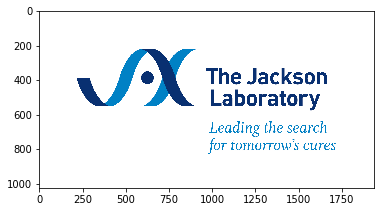

In [67]:
plt.imshow(jax);

In [68]:
print('\n # Dimensions: \t',jax.ndim,
      '\n        Shape: \t', jax.shape,
      '\n         Type: \t', jax.dtype)


 # Dimensions: 	 3 
        Shape: 	 (1024, 1938, 3) 
         Type: 	 uint8


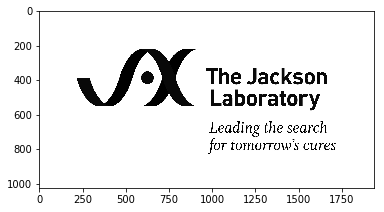

In [69]:
jax_bw = jax[:,:,0] #remember, this is the red channel
plt.imshow(jax_bw, cmap='gray');

In [70]:
# Arrays have the 'T' attribute, which is the transposed data
# transposed = order of axes flipped
print('\n Normal shape:     ', jax_bw.shape,
      '\n Transposed shape: ', jax_bw.T.shape)


 Normal shape:      (1024, 1938) 
 Transposed shape:  (1938, 1024)


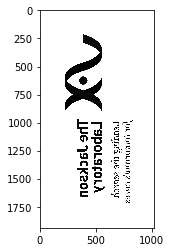

In [71]:
# flipping the axes has the effect of flipping the image along the diagonal
plt.imshow(jax_bw.T, cmap='gray');

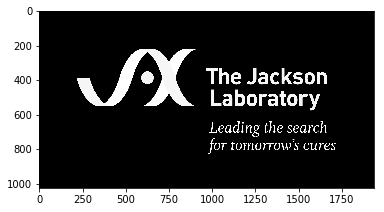

In [72]:
# You can also invert the b&w image
jax_invert = skimage.util.invert(jax_bw)
plt.imshow(jax_invert, cmap='gray');

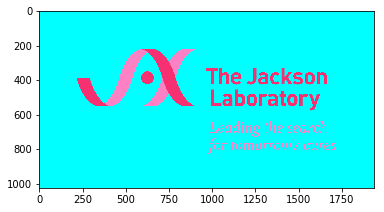

In [73]:
# what happens if we replace the red channel in the original image with the inverted red channel?

jax[:,:,0] = jax_invert
plt.imshow(jax);

In [74]:
# now to write out this new image
# you might get some warning, but it should work
imwrite('jax2.jpeg', jax)
imwrite('jax2.tif', jax)

In [75]:
# now lets read in an image "stack". This is a 3-dimensional image
# the different image "planes" in the stack are different focal depths
# note that we are using mimread(), not imread()
bf = mimread('bf_stack.tif')

In [76]:
#unfortunately mimread() creates a list of 2D images, not a 3D image
print('\n            Type: ', type(bf),
      '\n # items in list: ',len(bf))


            Type:  <class 'list'> 
 # items in list:  40



 # dimensions:  2 
        shape:  (442, 422)


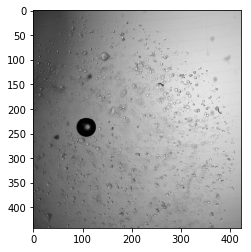

In [77]:
# peek at the first image in the stack
plt.imshow(bf[0], cmap='gray');
print('\n # dimensions: ', bf[0].ndim,
      '\n        shape: ', bf[0].shape)

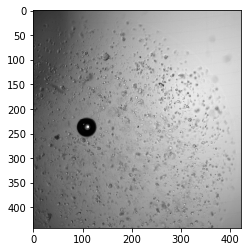

In [78]:
# here is a deeper focal plane
plt.imshow(bf[10], cmap='gray');

In [95]:
# we can make a volume manually
bf_vol = np.zeros([442, 422, 40], dtype='uint8')
i = 0
for x in bf:
    bf_vol[:,:,i] = x
    i += 1
    
print('\n # dimensions: ', bf_vol.ndim,
      '\n        shape: ', bf_vol.shape)


 # dimensions:  3 
        shape:  (442, 422, 40)


## Exercises

1. Produce max and min projections for bf_vol along each axis, and save each as a tif.
2. Create a max projection (axis=2) of a color-inverted bf_vol and crop it to the lower left quadrant.
3. Save the output of \#2 as a jpeg.

In [98]:
bf_max_0 = bf_vol.max(axis=0)
bf_max_1 = bf_vol.max(axis=1)
bf_max_2 = bf_vol.max(axis=2)

bf_min_0 = bf_vol.min(axis=0)
bf_min_1 = bf_vol.min(axis=1)
bf_min_2 = bf_vol.min(axis=2)

imwrite('bf_max_0.tif', bf_max_0)
imwrite('bf_max_1.tif', bf_max_1)
imwrite('bf_max_2.tif', bf_max_2)

imwrite('bf_min_0.tif', bf_min_0)
imwrite('bf_min_1.tif', bf_min_1)
imwrite('bf_min_2.tif', bf_min_2)

(221, 211)

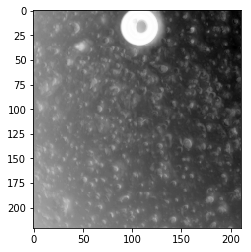

In [108]:
bf_invert = skimage.util.invert(bf_vol)
bf_inv_max = bf_invert.max(axis=2)
bf_inv_max_crop = bf_inv_max[221:442, 0:211]
plt.imshow(bf_inv_max_crop, cmap='gray');
bf_inv_max_crop.shape

In [109]:
imwrite('bf_inv_max_crop.jpeg', bf_inv_max_crop)

## Working with open files using PIL